# Deanonymizing bitcoin sources

We calculated the precision at every 1000th step and executed for a a max step of 300,000.

In [1]:
%matplotlib inline
import numpy as np
import tqdm as tqdm
import matplotlib.pyplot as plt
import networkx as nx
import os
import input_data as id

## Visualize our graph

/Users/nicky/anaconda2/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/nicky/anaconda2/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/nicky/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/nicky/anaconda2/lib/python2.7/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold i

diameter = 4


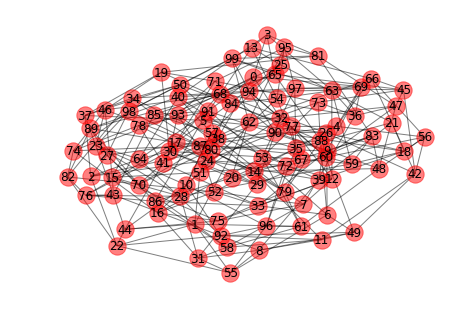

In [2]:
f = open("data/random_regular.gexf")
G = nx.read_gexf(f)

pos=nx.spectral_layout(G) # positions for all nodes
labels = {}
for i in range(100):
    labels[str(i)] = i
nx.draw(G,alpha=0.5,with_labels=True)
print 'diameter = {}'.format(nx.diameter(G))

In [3]:
def loss(node,hops):
    res = [node]
    while (hops > 0):
        additions = []
        for u in res:
            additions += [v for v in G.neighbors(u) if (v not in res)]
        res += [v for v in additions if (v not in res)]
        hops -= 1
    return res

In [4]:
def preprocess_data(data):
    """
    splits data into three columns (train, val, test)
    """
    for i, arr in enumerate(data):
        # strip last value
        data[i] = arr[:-1].reshape((-1,3))
    return data

## Varying the number of nodes in the 1st layer

we used `data/100_nodes/run1_<set>_labels`

In [6]:
h1 = []
h1 += [np.genfromtxt('tests/hid1/hid1_1.csv', delimiter=',')]
h1 += [np.genfromtxt('tests/hid1/hid1_2.csv', delimiter=',')]
h1 += [np.genfromtxt('tests/hid1/hid1_4.csv', delimiter=',')]
h1 += [np.genfromtxt('tests/hid1/hid1_8.csv', delimiter=',')]
h1 += [np.genfromtxt('tests/hid1/hid1_16.csv', delimiter=',')]
h1 += [np.genfromtxt('tests/hid1/hid1_32.csv', delimiter=',')]
h1 += [np.genfromtxt('tests/hid1/hid1_64.csv', delimiter=',')]
h1 += [np.genfromtxt('tests/hid1/hid1_128.csv', delimiter=',')]
h1 += [np.genfromtxt('tests/hid1/hid1_256.csv', delimiter=',')]
h1 += [np.genfromtxt('tests/hid1/hid1_512.csv', delimiter=',')]
h1 += [np.genfromtxt('tests/hid1/hid1_1024.csv', delimiter=',')]

h1 = preprocess_data(h1)

In [51]:
# accuracy results from first spy

def first_spy_acc(num_nodes, filename):
    '''
    num_nodes: 'the number of nodes, Ie, 100
    filename: the name of the dataset. Ie 'run1_test`
    '''
    with open(os.path.join('data',num_nodes+'_nodes',filename)) as f:
        features = id.extract_features(f)

    y_hat = np.argmin(features,axis=1)

    with open(os.path.join('data',num_nodes+'_nodes',filename+'_labels')) as f:
        y = id.extract_labels(f)

    n = y.shape[0]
    acc = np.count_nonzero((y - y_hat)==0)*1.0/ n
    res = [0]
    for i, val in enumerate(y-y_hat):
        if val == 0:
            res += [(res[-1] + 1)]
        else:
            res += [res[-1]]
    res = np.array(res, dtype=np.float32)
    res /= n
    return acc

In [52]:
def plot_data(data,labels):
    for i, arr in enumerate(data):
        titles = ['train', 'val', 'test']
        plt.figure()
        for j in range(3):
            plt.subplot(2,2,j+1)
            plt.plot((data[i])[:,j])
            plt.title(titles[j])
            plt.xlim(0,300)
            plt.ylim(0,.6)
            plt.xlabel('steps (k)')
            plt.ylabel('accuracy')
        plt.suptitle(labels[i])
        plt.show()

Extracting data/100_nodes/run1_train
Extracting data/100_nodes/run1_train_labels
Extracting data/100_nodes/run1_test
Extracting data/100_nodes/run1_test_labels
0.346813333333
0.343066666667


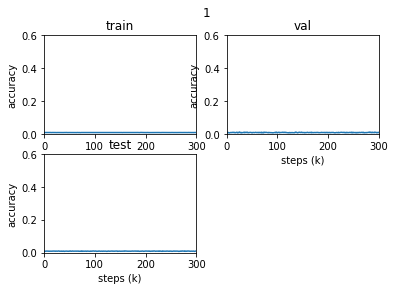

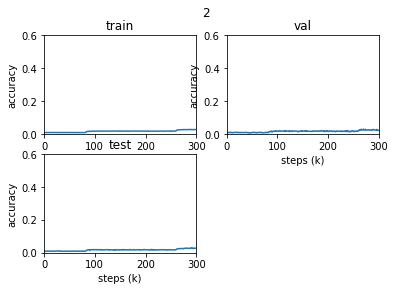

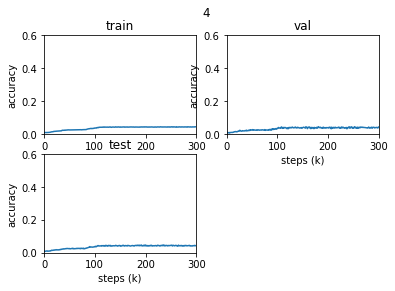

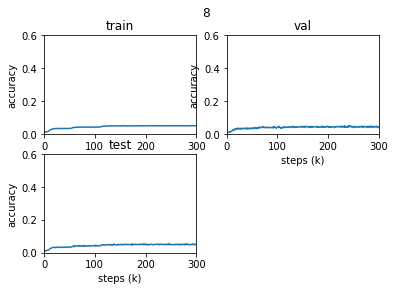

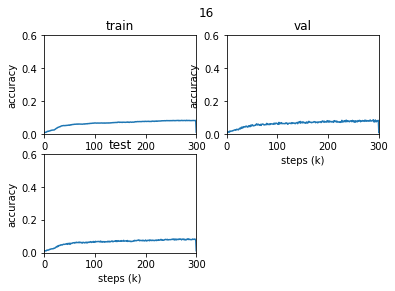

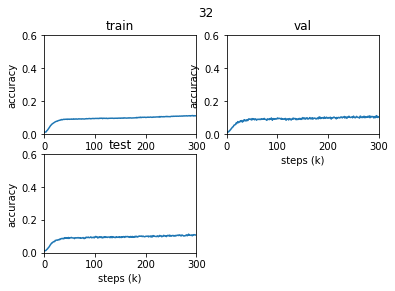

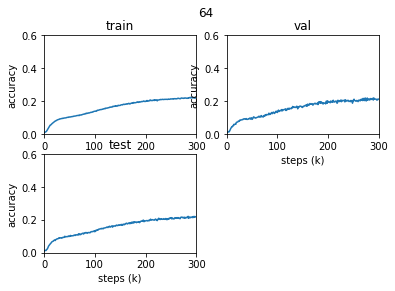

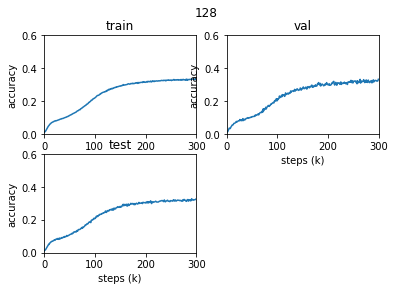

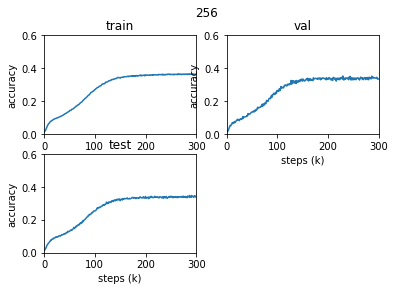

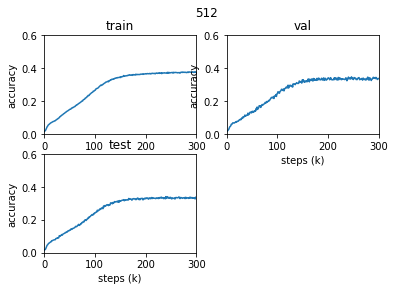

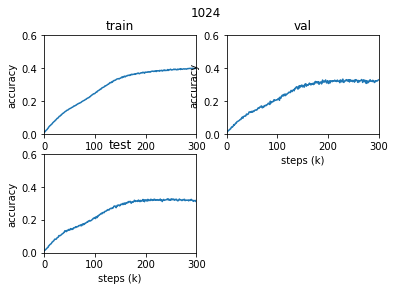

In [53]:
first_spy_train = first_spy_acc('100','run1_train')
first_spy_test = first_spy_acc('100','run1_test')

print first_spy_train
print first_spy_test
plot_data(h1,[1,2,4,8,16,32,64,128,256,512,1024])

In [78]:
def plot_group(ds, j, lbl, ref=-1):
    '''
    ds - dataset for plotting
    j - (0) train, (1) val, (2), test
    lbl - label for datasets
    '''
    plt.figure()
    titles = ['train', 'val', 'test']
    n = ds[0].shape[0]

    for i, arr in enumerate(ds):
        plt.plot((ds[i])[:,j], label=lbl[i])
        plt.xlim(0,300)
        plt.ylim(0,.4)
        plt.xlabel('steps (k)')
        plt.ylabel('accuracy')
    if (ref != -1):
        plt.plot(range(n),[ref]*n,'r--', label='first spy')
    plt.title(titles[j])
    plt.legend(bbox_to_anchor=[1.3, 0.5], loc='center right')

    plt.show()

Extracting data/100_nodes/run1_train
Extracting data/100_nodes/run1_train_labels
Extracting data/100_nodes/run1_test
Extracting data/100_nodes/run1_test_labels


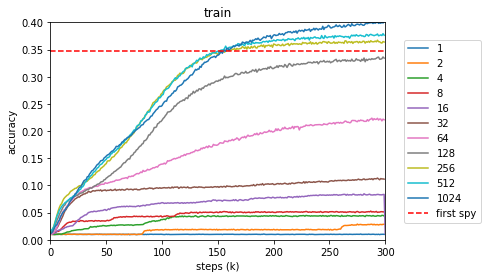

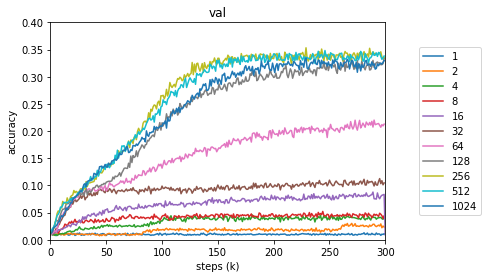

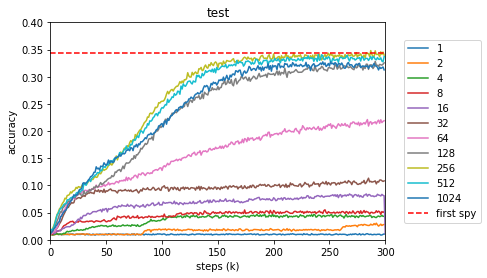

In [79]:
first_spy_train = first_spy_acc('100','run1_train')
first_spy_test = first_spy_acc('100','run1_test')

lbl = [2**x for x in range(11)]
plot_group(h1, 0, lbl, first_spy_train)
plot_group(h1 ,1, lbl)
plot_group(h1, 2, lbl, first_spy_test)

# Trying 100 x 100

In [12]:
oneH = []
oneH += [np.genfromtxt('tests/100x100/100x100_100.csv', delimiter=',')]

preprocess_data(oneH)
print oneH[0].shape

(300, 3)


Extracting data/100_nodes/run1_train
Extracting data/100_nodes/run1_train_labels
Extracting data/100_nodes/run1_test
Extracting data/100_nodes/run1_test_labels


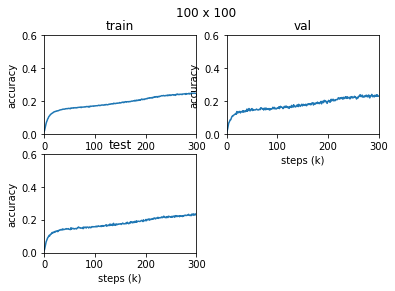

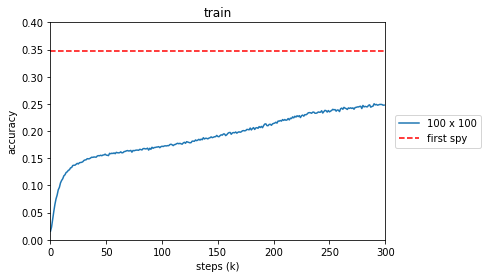

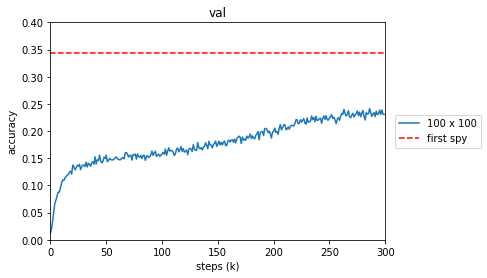

In [84]:
first_spy_train = first_spy_acc('100','run1_train')
first_spy_test = first_spy_acc('100','run1_test')

plot_data(oneH,['100 x 100'])

plot_group(oneH,0,['100 x 100'], first_spy_train)
plot_group(oneH,1,['100 x 100'], first_spy_test)

# Vary datasize

With the initial run of data at 300k data points, we run tests to see if more data points yields better training accuracy. We did if over 300k steps. Each incremental test adds 50k data points.

We log datapoints every 1k steps. As a result, we should have 300 datapoints.

In [14]:
ds = []

ds+= [np.genfromtxt('tests/datasize/datasize_300000.csv', delimiter=',')] # run 1
ds+= [np.genfromtxt('tests/datasize/datasize_350000.csv', delimiter=',')] # run 2
ds+= [np.genfromtxt('tests/datasize/datasize_400000.csv', delimiter=',')] # run 3
ds+= [np.genfromtxt('tests/datasize/datasize_450000.csv', delimiter=',')] # run 4
ds+= [np.genfromtxt('tests/datasize/datasize_500000.csv', delimiter=',')] # run 5
ds+= [np.genfromtxt('tests/datasize/datasize_550000.csv', delimiter=',')] # run 6
ds+= [np.genfromtxt('tests/datasize/datasize_600000.csv', delimiter=',')] # run 7
ds+= [np.genfromtxt('tests/datasize/datasize_650000.csv', delimiter=',')] # run 8


ds = preprocess_data(ds)

Extracting data/100_nodes/run1_train
Extracting data/100_nodes/run1_train_labels
Extracting data/100_nodes/run1_test
Extracting data/100_nodes/run1_test_labels
0.346813333333
0.343066666667


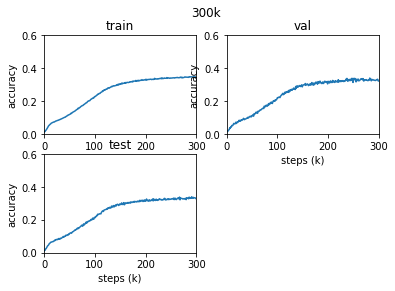

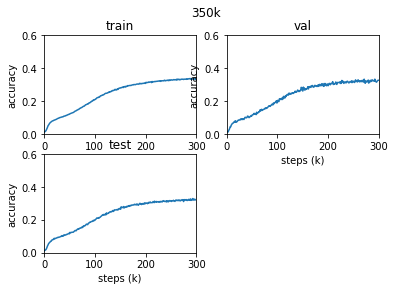

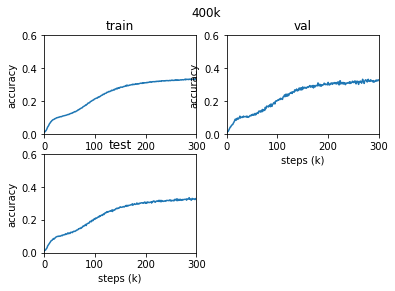

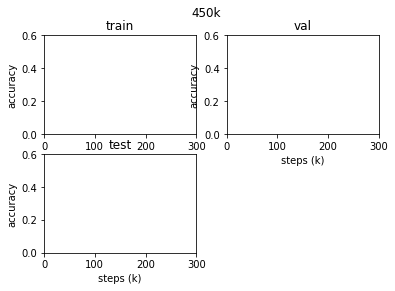

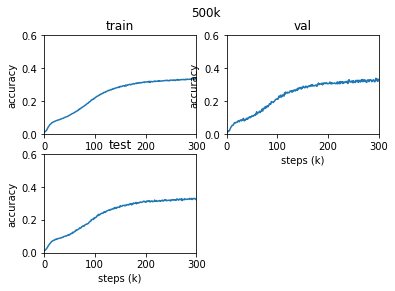

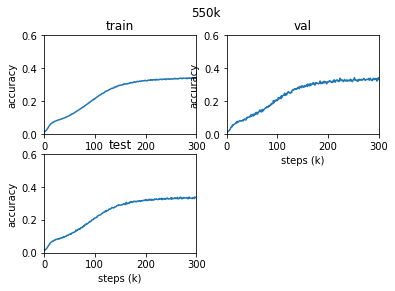

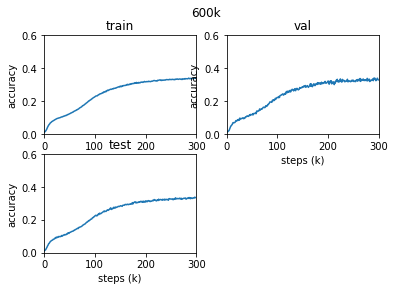

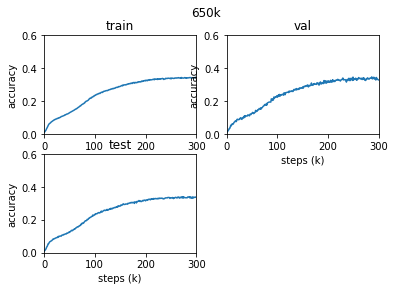

In [15]:
first_spy_train = first_spy_acc('100','run1_train')
first_spy_test = first_spy_acc('100','run1_test')

print first_spy_train
print first_spy_test
plot_data(ds,['300k','350k','400k','450k','500k','550k','600k','650k'])

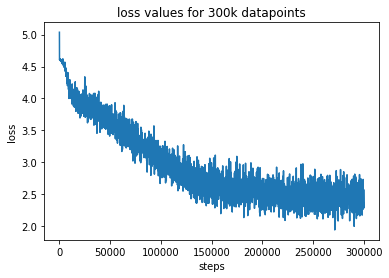

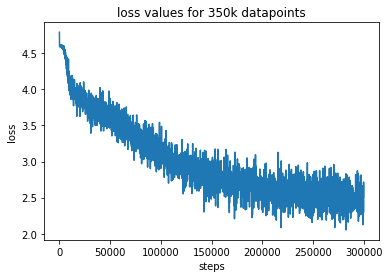

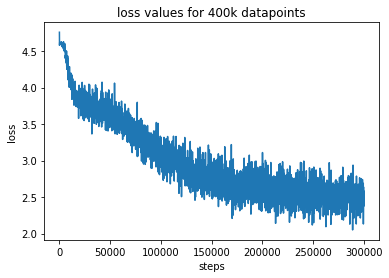

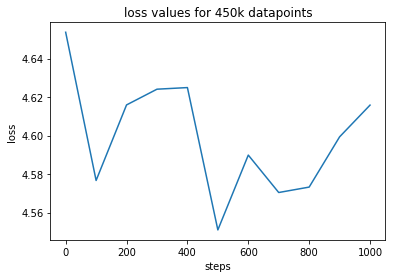

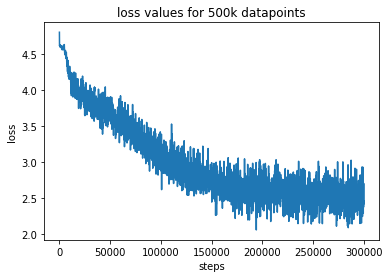

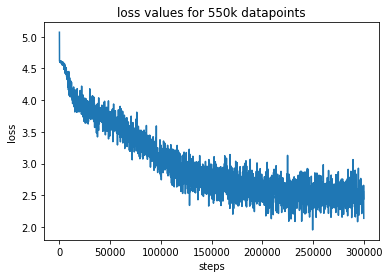

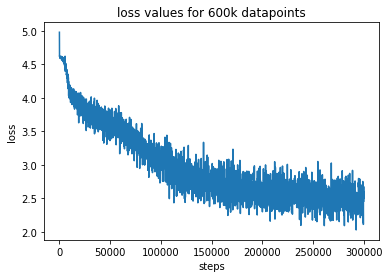

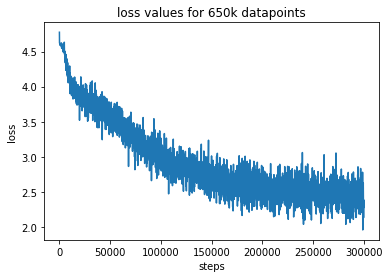

In [16]:
loss = []

loss += [np.genfromtxt('tests/datasizeloss/datasizeloss_300000.csv', delimiter=',')]
loss += [np.genfromtxt('tests/datasizeloss/datasizeloss_350000.csv', delimiter=',')]
loss += [np.genfromtxt('tests/datasizeloss/datasizeloss_400000.csv', delimiter=',')]
loss += [np.genfromtxt('tests/datasizeloss/datasizeloss_450000.csv', delimiter=',')]
loss += [np.genfromtxt('tests/datasizeloss/datasizeloss_500000.csv', delimiter=',')]
loss += [np.genfromtxt('tests/datasizeloss/datasizeloss_550000.csv', delimiter=',')]
loss += [np.genfromtxt('tests/datasizeloss/datasizeloss_600000.csv', delimiter=',')]
loss += [np.genfromtxt('tests/datasizeloss/datasizeloss_650000.csv', delimiter=',')]


for i, arr in enumerate(loss):
    plt.figure()
    plt.plot([100*j for j in range(len(arr))],arr)
    plt.title('loss values for '+str(300 + i*50)+'k datapoints')
    plt.xlabel('steps')
    plt.ylabel('loss')
    plt.show()


## Comparing accuracy of increasing datasize for training

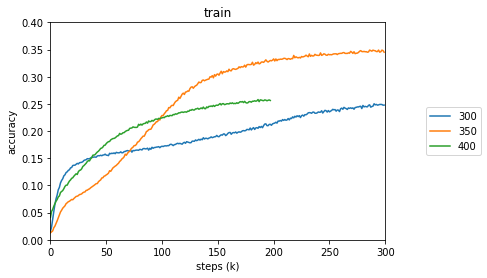

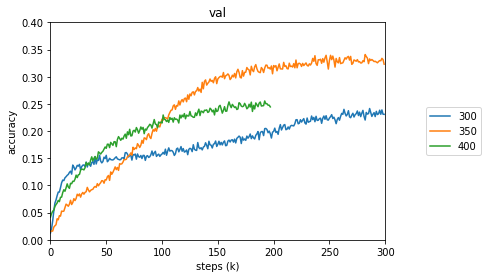

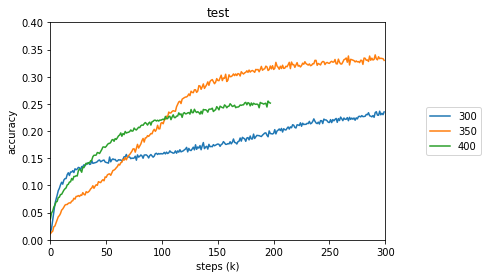

In [85]:
lbl = [300 + (x)*50 for x in range(11)]
plot_group(ds, 0, lbl)
plot_group(ds, 1, lbl)
plot_group(ds, 2, lbl)

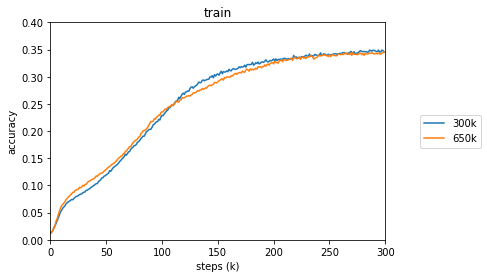

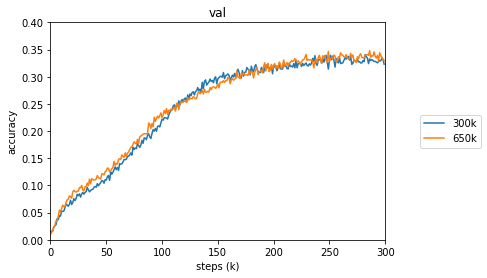

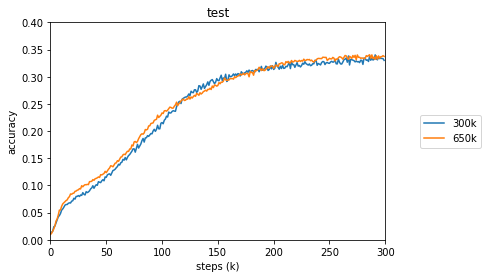

In [18]:
# plot just highest and lowest
ds = []
ds+= [np.genfromtxt('tests/datasize/datasize_300000.csv', delimiter=',')] # run 1
ds+= [np.genfromtxt('tests/datasize/datasize_650000.csv', delimiter=',')] # run 8

ds = preprocess_data(ds)
lbl = ['300k','650k']
plot_group(ds, 0, lbl)
plot_group(ds, 1, lbl)
plot_group(ds, 2, lbl)

**Conclusion** It seems that increasing the datasize doees not help improve the accuracy as it still plateaus at approx. _35_%

## Debugging with smaller datasize

Using 50k datapoints

`python fully_connected_feed.py --max_steps 30000 --debug True`

## Vary number of classes

The poor accuracy could be due to the large number of classes. Below, we experiment with 2 and 10 classes

['0', '32', '51', '1']


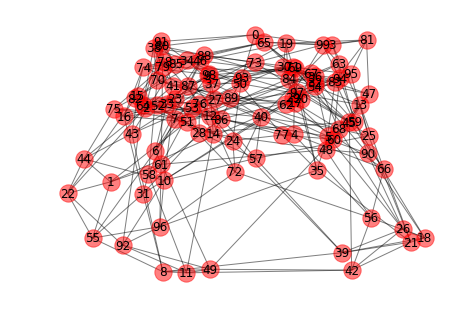

In [25]:
with open("data/random_regular.gexf") as f:
    G = nx.read_gexf(f)
    pos=nx.spectral_layout(G) # positions for all nodes
    labels = {}
    for i in range(100):
        labels[str(i)] = i
    nx.draw(G,pos,alpha=0.5,with_labels=True)
    print nx.shortest_path(G,'0','1')

In [88]:
vary_classes = []

vary_classes += [np.genfromtxt('tests/two_classes/two_classes_50000.csv', delimiter=',')]
vary_classes += [np.genfromtxt('tests/ten_classes/ten_classes_50000.csv', delimiter=',')]

vary_classes = preprocess_data(vary_classes)
vary_classes = np.array(vary_classes)
print vary_classes[0].shape
print vary_classes[1].shape

(320, 3)
(300, 3)


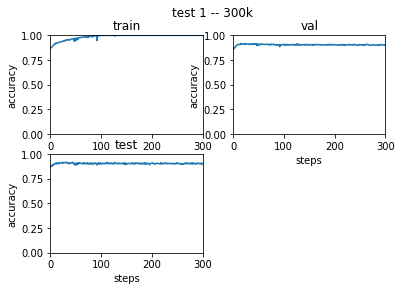

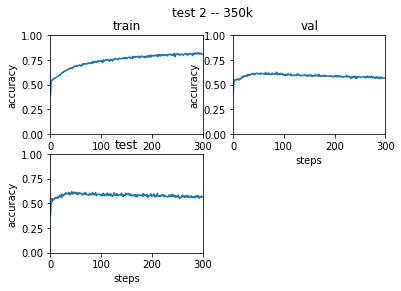

[ 1.      0.9006  0.8976]


In [89]:
for i, arr in enumerate(vary_classes):
    titles = ['train', 'val', 'test']
    plt.figure()
    for j in range(3):
        plt.subplot(2,2,j+1)
        plt.plot((vary_classes[i])[:,j])
        plt.title(titles[j])
        plt.xlim(0,300)
        plt.ylim(0,1)
        plt.xlabel('steps')
        plt.ylabel('accuracy')
    plt.suptitle('test ' + str(i+1) + ' -- ' + str(300 + i*50)+'k')
    plt.show()

print vary_classes[0][-1]

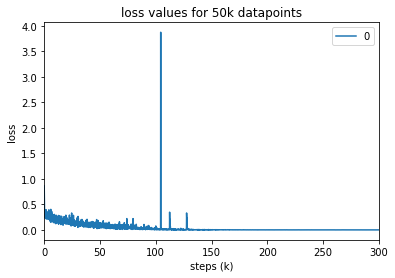

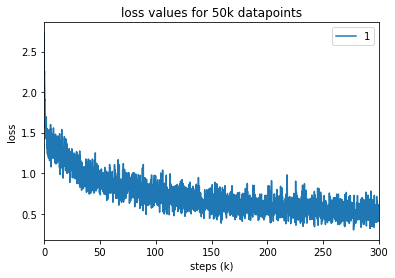

In [90]:
loss = []

loss += [np.genfromtxt('tests/two_classesloss/two_classesloss_50000.csv', delimiter=',')]
loss += [np.genfromtxt('tests/ten_classesloss/ten_classesloss_50000.csv', delimiter=',')]

for i, arr in enumerate(loss):
    plt.figure()
    plt.plot([j/10.0 for j in range(len(arr))],arr,label=i)
    plt.xlim(0,300)
    plt.title('loss values for 50k datapoints')
    plt.xlabel('steps (k)')
    plt.ylabel('loss')
    plt.legend()
    plt.show()
    


In [91]:
print loss[0][1044]
print len(loss[0])

3.87313
3204


## different graph

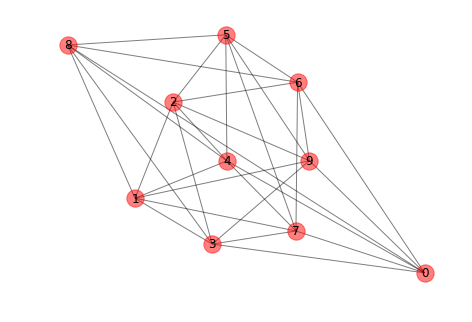

In [92]:
f = open("data/random_regular_10nodes.gexf")
G = nx.read_gexf(f)

pos=nx.spectral_layout(G) # positions for all nodes
labels = {}
for i in range(100):
    labels[str(i)] = i
nx.draw(G,alpha=0.5,with_labels=True)

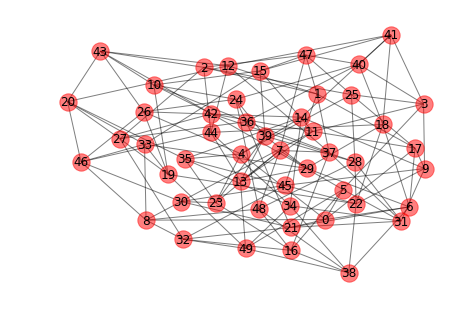

In [93]:
f = open("data/random_regular_50nodes.gexf")
G = nx.read_gexf(f)

pos=nx.spectral_layout(G) # positions for all nodes
labels = {}
for i in range(100):
    labels[str(i)] = i
nx.draw(G,alpha=0.5,with_labels=True)

## Varied batch size

Varying batch size does not seem to conclusive

In [94]:
vary_batch = []

vary_batch += [np.genfromtxt('tests/batchsize/batchsize_10_50000.csv', delimiter=',')]
vary_batch += [np.genfromtxt('tests/batchsize/batchsize_50_50000.csv', delimiter=',')]
vary_batch += [np.genfromtxt('tests/batchsize/batchsize_200_50000.csv', delimiter=',')]
vary_batch += [np.genfromtxt('tests/batchsize/batchsize_500_50000.csv', delimiter=',')]

vary_batch = preprocess_data(vary_batch)
vary_batch = np.array(vary_batch)
print vary_batch[0].shape

(300, 3)


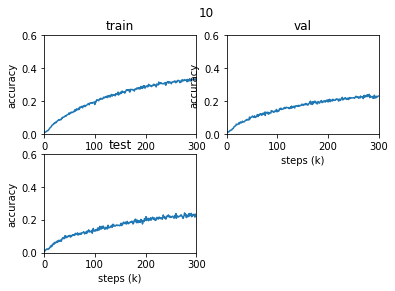

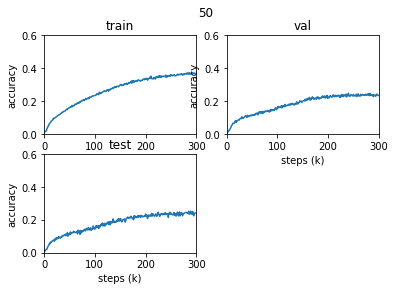

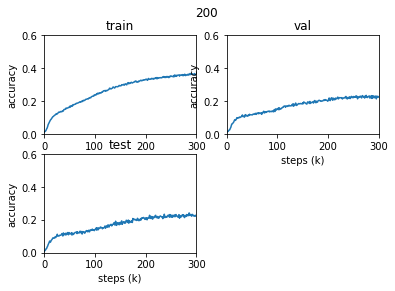

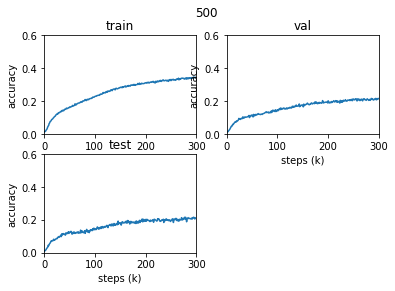

In [95]:
plot_data(vary_batch,['10','50','200','500'])

Extracting data/100_nodes/run1_train
Extracting data/100_nodes/run1_train_labels
Extracting data/100_nodes/run1_test
Extracting data/100_nodes/run1_test_labels


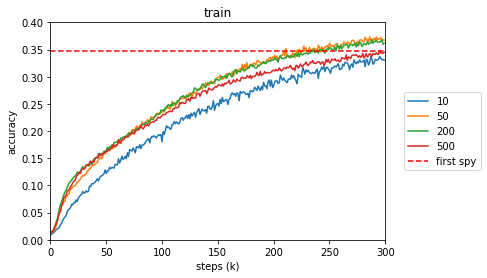

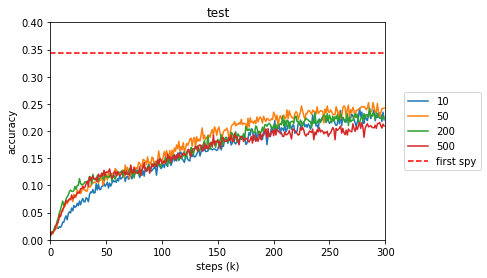

In [97]:
first_spy_train = first_spy_acc('100','run1_train')
first_spy_test = first_spy_acc('100','run1_test')

plot_group(vary_batch, 0, ['10','50','200','500'], first_spy_train)
plot_group(vary_batch, 2, ['10','50','200','500'], first_spy_test)

## CNN on small 10-node graph

In [35]:
cnn = []

cnn += [np.genfromtxt('tests/cnn_10nodes/cnn_10nodes_50000.csv', delimiter=',')]

cnn = preprocess_data(cnn)
cnn = np.array(cnn)
print cnn[0].shape

(298, 3)


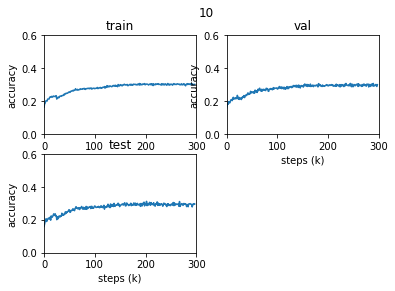

In [36]:
plot_data(cnn,['10'])

## CNN on 100-node graph
`python fully_connected_feed.py --hidden1 100 --hidden2 100 --graph_name random_regular.gexf --testname cnn_100nodes --restore`

In [47]:
cnn = []

cnn += [np.genfromtxt('tests/cnn_100nodes/cnn_100nodes_300000.csv', delimiter=',')]

cnn = preprocess_data(cnn)
cnn = np.array(cnn)
print cnn[0].shape

(198, 3)


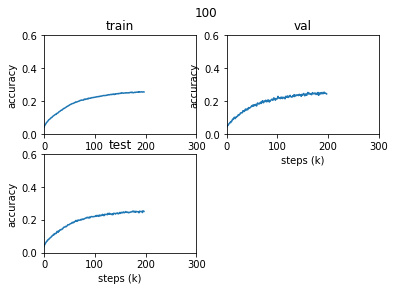

In [48]:
plot_data(cnn,['100'])

## Comparing regular vs cnn

For regular, we have the default set up and 100 x 100

In [101]:
ds = []

ds += [np.genfromtxt('tests/100x100/100x100_100.csv', delimiter=',')]
ds += [np.genfromtxt('tests/datasize/datasize_300000.csv', delimiter=',')]
ds += [np.genfromtxt('tests/cnn_100nodes/cnn_100nodes_300000.csv', delimiter=',')]

reg_vs_cnn = preprocess_data(ds)

In [102]:
first_spy_train = first_spy_acc('100','run1_train')
first_spy_test = first_spy_acc('100','run1_test')

Extracting data/100_nodes/run1_train
Extracting data/100_nodes/run1_train_labels
Extracting data/100_nodes/run1_test
Extracting data/100_nodes/run1_test_labels


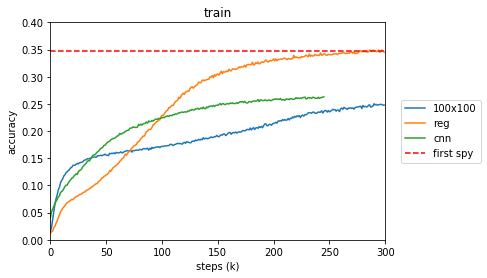

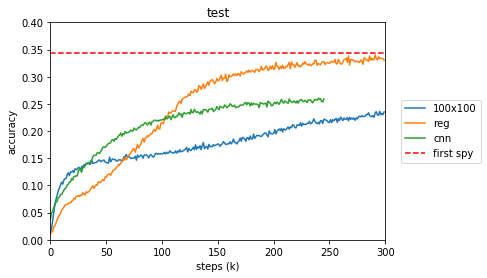

In [103]:
plot_group(ds, 0, ['100x100','reg','cnn'], first_spy_train)
plot_group(ds, 2, ['100x100','reg','cnn'], first_spy_test)